In [1]:
1+1

2

In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph ,START ,END
from typing import TypedDict
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
api_key=os.getenv('GROQ_API_KEY')

In [ ]:
model=ChatGroq(model='llama3-8b-8192',api_key="")

In [4]:
model.invoke("hii")

AIMessage(content="Hii! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 12, 'total_tokens': 38, 'completion_time': 0.045280697, 'prompt_time': 0.0079397, 'queue_time': 0.369363421, 'total_time': 0.053220397}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--0a6824c4-a907-489d-a8a8-61724ff99665-0', usage_metadata={'input_tokens': 12, 'output_tokens': 26, 'total_tokens': 38})

In [25]:
class LLMw(TypedDict):
    qustion:str
    ans:str

In [27]:
def llm_talk(state:LLMw)->LLMw:
    qustion=state['qustion']
    prompt=f'answer the following qustion {qustion}'
    ans=model.invoke(prompt)
    state['ans']=ans
    return state

In [29]:
graph=StateGraph(LLMw)
# add node 
graph.add_node('llm_talk',llm_talk)
# add edge
graph.add_edge(START,'llm_talk')
graph.add_edge('llm_talk',END)

workflow=graph.compile()

In [30]:
initail_state={'qustion':'what is the black hole'}

In [31]:
final_state=workflow.invoke(initail_state)

In [35]:
final_state['ans'].content

'A fascinating topic!\n\nA black hole is a region in space where the gravitational pull is so strong that nothing, including light, can escape. It is formed when a massive star collapses in on itself and its gravity becomes so strong that it warps the fabric of spacetime around it.\n\nHere\'s a simplified explanation:\n\n**How a black hole forms:**\n\n1. A massive star runs out of fuel and dies.\n2. The star collapses under its own gravity, causing a massive amount of matter to be compressed into a tiny point called a singularity.\n3. The gravity of the singularity becomes so strong that it creates a boundary called the event horizon.\n4. Once something crosses the event horizon, it is trapped by the black hole\'s gravity and cannot escape.\n\n**Properties of a black hole:**\n\n1. **Mass:** Black holes come in a range of masses, from a few solar masses to supermassive black holes found at the centers of galaxies, with masses millions or even billions of times that of the sun.\n2. **Eve

## prompt chaining

In [5]:
class Blockstaet(TypedDict):
    tital:str
    outline:str
    content:str

In [7]:
def create_outline(state:Blockstaet)->Blockstaet:
    tital=state['tital']
    prompt=f'genearate a outiline dor this tital {tital}'
    outline=model.invoke(prompt)
    state['outline']=outline
    return state

In [8]:
def create_content(state:Blockstaet)->Blockstaet:
    outline=state['outline']
    prompt=f'generare a content use this outline{outline}'
    content=model.invoke(prompt)
    state['content']=content
    return state

In [9]:
graph=StateGraph(Blockstaet)
# add node 
graph.add_node('create_outline',create_outline)
graph.add_node('create_content',create_content)
# add edge
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_content')
graph.add_edge('create_content',END)

workflow=graph.compile()

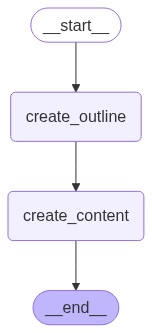

In [10]:
workflow

In [13]:
initial_staet={'tital':'AI'}

In [15]:
final=workflow.invoke(initial_staet)

In [16]:
final

{'tital': 'AI',
 'outline': AIMessage(content="Here is a potential outline for an article about AI:\n\n**I. Introduction**\n\n* Definition of AI and its significance in modern technology\n* Brief overview of the article's content\n\n**II. What is AI?**\n\n* Explanation of the basic concepts of AI, such as machine learning and deep learning\n* Examples of how AI is used in various industries and applications\n\n**III. History of AI**\n\n* Overview of the history of AI, from its origins in the 1950s to the present day\n* Key milestones and breakthroughs in AI research and development\n\n**IV. Types of AI**\n\n* Explanation of the different types of AI, such as:\n\t+ Narrow or weak AI: focused on a specific task or domain\n\t+ General or strong AI: capable of general intelligence and problem-solving\n\t+ Superintelligence: significantly more intelligent than the human brain\n\t+ Artificial general intelligence (AGI): capable of performing any intellectual task\n\n**V. Applications of AI**